### Dependencies

In [17]:
from __future__ import print_function
import torch

## NN Model

In [18]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from time import time

In [19]:
from torch.utils.tensorboard import SummaryWriter

In [20]:
writer = SummaryWriter('runs/fashion_mnist_experiment_1')

In [21]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [22]:
# define data transforms
transform = transforms.Compose({
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
})

In [23]:
# cifar10 dataset

trainset = torchvision.datasets.CIFAR10(
    root="./data",
    train=True,
    download=True,
    transform=transform,
)
testset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True,
    transform=transform
)

Files already downloaded and verified
Files already downloaded and verified


In [24]:
# data loader

trainloader = torch.utils.data.DataLoader(
    dataset=trainset,
    batch_size=32,
    shuffle=True,
)

testloader = torch.utils.data.DataLoader(
    dataset=testset,
    batch_size=32,
    shuffle=False,
)

In [25]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

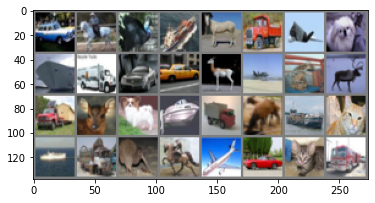

  car horse  bird  ship


In [26]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Writing images into tensorboard

In [27]:
# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

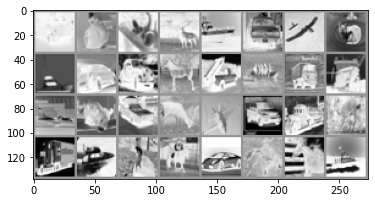

In [28]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# create grid of images
img_grid = torchvision.utils.make_grid(images)

# show images
matplotlib_imshow(img_grid, one_channel=True)

# write to tensorboard
writer.add_image('four_fashion_mnist_images', img_grid)

### Writing training logs into tensorboard


In [29]:
# def images_to_probs(net, images):
    
#     ## generating predictions and corresponding probabalities 
#     ## from a trained network and list of images
    
#     output = net(images)
    
#     _
    
    
    

In [30]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(
            in_channels=3,
            out_channels=6,
            kernel_size=5,
        )
        self.pool = nn.MaxPool2d(
            kernel_size=3,
            stride=2
        )
        self.conv2 = nn.Conv2d(
            in_channels=6,
            out_channels=16,
            kernel_size=3
        )
        
        self.fc1 = nn.Linear(in_features=16*5*5, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=24)
        self.fc3 = nn.Linear(in_features=24, out_features=10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [37]:
net = Net().to(device)

#### Writing models into tensorboard

In [38]:
writer.add_graph(net, images)
writer.close()

In [40]:
# print(net)

In [41]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [42]:
start = time()
for epoch in range(10):  # loop over the dataset multiple times
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # print statistics
        running_loss += loss.item()
        
        
        
        
        if (i+1) % 100 == 0:    # print every 2000 mini-batches
#             print('[%d, %5d] loss: %.3f' %
#                   (epoch + 1, i + 1, running_loss / 2000))
#             t = time() - start
            print(f'EPOCH = {epoch} | STEPS = {i} | LOSS = {running_loss/100}')
            # write the loss into tensorboard
            writer.add_scalar(
                "training_loss",
                running_loss/100,
                epoch * len(trainloader) + i
            )
            running_loss = 0.0

end = time()
print(f'Finished Training, Total Training Time = {end - start} sec')

EPOCH = 0 | STEPS = 99 | LOSS = 2.304589910507202
EPOCH = 0 | STEPS = 199 | LOSS = 2.301548705101013
EPOCH = 0 | STEPS = 299 | LOSS = 2.3039156436920165
EPOCH = 0 | STEPS = 399 | LOSS = 2.300324885845184
EPOCH = 0 | STEPS = 499 | LOSS = 2.295292913913727
EPOCH = 0 | STEPS = 599 | LOSS = 2.292567446231842
EPOCH = 0 | STEPS = 699 | LOSS = 2.286115753650665
EPOCH = 0 | STEPS = 799 | LOSS = 2.277649157047272
EPOCH = 0 | STEPS = 899 | LOSS = 2.2661497449874877
EPOCH = 0 | STEPS = 999 | LOSS = 2.239823818206787
EPOCH = 0 | STEPS = 1099 | LOSS = 2.208908097743988
EPOCH = 0 | STEPS = 1199 | LOSS = 2.1676531648635864
EPOCH = 0 | STEPS = 1299 | LOSS = 2.1305530750751496
EPOCH = 0 | STEPS = 1399 | LOSS = 2.1056312131881714
EPOCH = 0 | STEPS = 1499 | LOSS = 2.057681146860123
EPOCH = 1 | STEPS = 99 | LOSS = 2.035340563058853
EPOCH = 1 | STEPS = 199 | LOSS = 2.007400381565094
EPOCH = 1 | STEPS = 299 | LOSS = 1.9740932154655457
EPOCH = 1 | STEPS = 399 | LOSS = 1.9463115787506104
EPOCH = 1 | STEPS = 4

### Adding projector to tensorboard


In [38]:
# # helper datanction
# def select_n_random(data, labels, n=100):
#     '''
#     Selects n random datapoints and their corresponding labels from a dataset
#     '''
#     assert len(data) == len(labels)

#     perm = torch.randperm(len(data))
#     return data[perm][:n], labels[perm][:n]

# # select random images and their target indices
# images, labels = select_n_random(trainset.data, trainset.targets)

# # get the class labels for each image
# class_labels = [classes[lab] for lab in labels]

# # # log embeddings
# # features = images.view(-1, 28 * 28)
# # writer.add_embedding(features,
# #                     metadata=class_labels,
# #                     label_img=images.unsqueeze(1))
# # writer.close()


In [15]:
## saving trained model
PATH = './cifar_net.pth'
# torch.save(net.state_dict(), PATH)
# torch.save(net, PATH)

In [16]:
model = torch.load(PATH)

In [17]:
model.state_dict

<bound method Module.state_dict of Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=24, bias=True)
  (fc3): Linear(in_features=24, out_features=10, bias=True)
)>

In [18]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 10 %


In [21]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 77 %
Accuracy of   car : 82 %
Accuracy of  bird : 55 %
Accuracy of   cat : 43 %
Accuracy of  deer : 59 %
Accuracy of   dog : 56 %
Accuracy of  frog : 77 %
Accuracy of horse : 68 %
Accuracy of  ship : 80 %
Accuracy of truck : 81 %


In [20]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 67 %


## Tensorboard Setup

In [24]:
!conda install res

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - res

Current channels:

  - https://repo.anaconda.com/pkgs/main/linux-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/linux-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.


